# Features of Gobike Bike Users   


## Investigation Overview

> In this investigation, I wanted to look at the features of bike users that have large effects on Gobike usage in January. The main focus was on duration_min, hour, weekday, gender, and start_station_name.

## Dataset Overview

> There were 94802 individual rides in the dataset with 16 features(duration_sec,start_station_id, user_type, etc) at the beginning. I added hour and weekday for this analysis. Also, 7839 data points were removed from the analysis due to missing infomation on member_birth_year. To make the data to be more accurate, I only selected data with age less than 80 and duration_min less than 90.

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [45]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201801-fordgobike-tripdata.csv')

In [46]:
#Select data when member_birth_year is not null and create hour and weekday columns
df= df[df.member_birth_year.notnull()]
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour']= df.start_time.dt.hour
df['weekday']= df.start_time.dt.weekday_name

In [47]:
#Convert sec to min and birth year to age 
df.duration_sec = df.duration_sec /60
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)
df.member_birth_year = df.member_birth_year.astype(int)
df.member_birth_year = 2018 - df.member_birth_year
df.rename(columns={'member_birth_year':'age'}, inplace=True)

## Distribution of User Types

> The majority of Gobike rides are made by subscriber in January. Only few portion of bike users is customer. By using the bar chart, we can clearly see that the ratio of subscriber and customer is about 8:1.

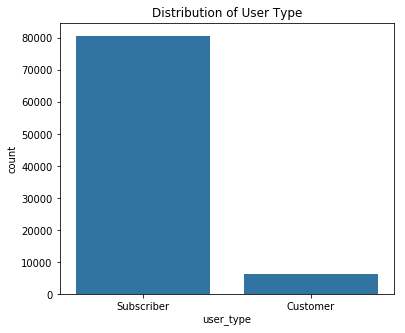

In [48]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[6, 5])
plt.title('Distribution of User Type')
sb.countplot(data = df, x = 'user_type', color= base_color);

## Distribution of hour

> By use a displot chart, we can see the bike usage of each hour. The plot shows the peak usage hours are at 8 am and 5 pm. We can make assumption that shared bikes are used as a mean of commuting to work.

In [49]:
#Select data with age less than 80
df_new = df.query('age < 80')

ordinal_var_dict = {'weekday': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_new[var] = df_new[var].astype(ordered_var)

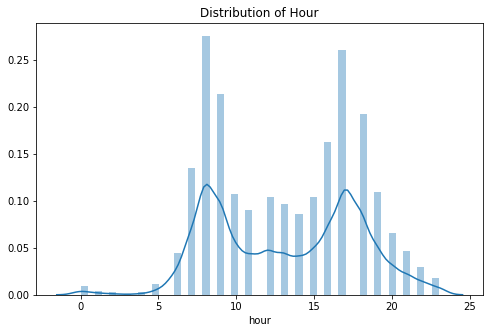

In [50]:
plt.figure(figsize=[8, 5])
plt.title('Distribution of Hour')
sb.distplot(df_new['hour']);

## Weekday vs. Duration_min

> By using boxplot for duration_min, we can see the statistics of duration_min for weekday. In this distribution, it indicates that the mean of duration_min for weekdays is around 10 mins and the distribution is very consistant from Monday to Friday. However, duration_min is longer for weekend.  

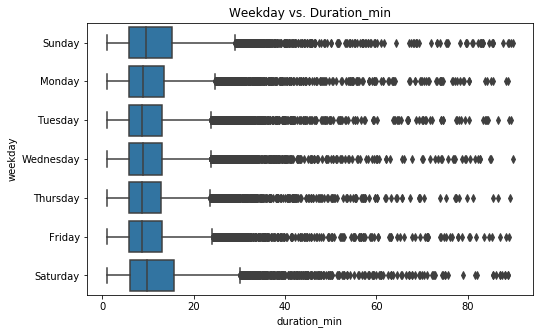

In [51]:
df_final = df_new.query('duration_min < 90')
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
plt.title('Weekday vs. Duration_min')
sb.boxplot(data = df_final, x = 'duration_min', y = 'weekday', color = base_color);

## Weekday Usage for User_type

>The distribution shows that more subscribers use bike on weekdays than weekend even though the duration_min for weekday is less than weekend(based on the last graph). For customers, distribution is pretty consistant and the usage is much less than subscribers. It is reasonable since number of customer is less than subscriber.

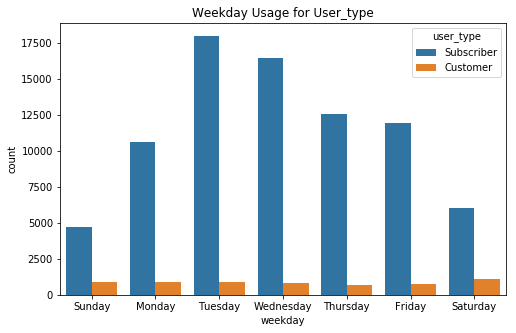

In [52]:
plt.figure(figsize=[8, 5])
plt.title('Weekday Usage for User_type')
sb.countplot(data = df_final, x = 'weekday', hue = 'user_type');

## Duration_min and Weekday by Member_gender

> Although there are more male members than female members in this database, the duration min for female members is actually higher, especially during the weekend. By using FaceGrid, I can create plot for each subset. It is easier to compare data for each gender this way.

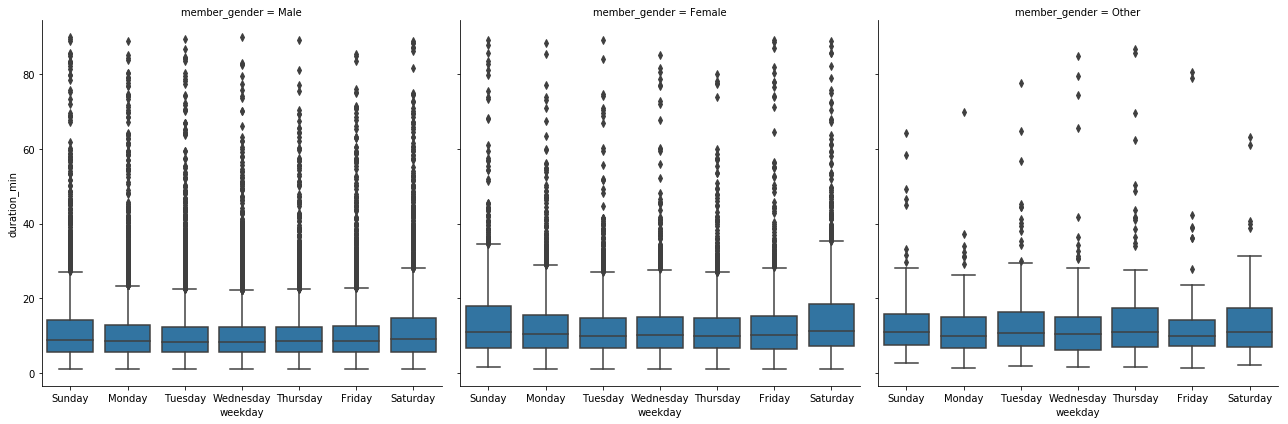

In [53]:
g = sb.FacetGrid(data = df_final, col = 'member_gender', size = 6)
g.map(sb.boxplot, 'weekday', 'duration_min');

## Duration_min and Weekday by User_type

> From this clustered bar chart, we can see that the average trip subscriber take is 10 min and it is almost the same every day. However, customber usually use bikes for longer time during the weekend compare to weekdays.Since customer is a small portion of this database, it does not make a big effect.

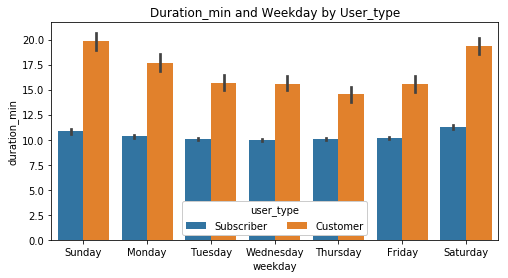

In [54]:
plt.figure(figsize=[8, 4])
ax = sb.barplot(data = df_final, x = 'weekday', y = 'duration_min', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
ax.set_title('Duration_min and Weekday by User_type');

## Conclusion

>  In this database, we can see that most users are subscribers and male. They used GoBike on weekdays especially 8 am and 5 pm and the average trip for them is around 10 mins. From this perspective, we can say that GoBike users mainly use bike for commuting to work. From the exporation, bike users were coming from the outskrits of the city and end up stopping in downtown San Francisco or Financial District.